<a href="https://colab.research.google.com/github/EdioHub/Perceptron-Diagnosis-of-heart-disease/blob/main/PerceptronIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from matplotlib.cbook import boxplot_stats
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

# Definição dos hiperparâmetros

In [ ]:
# Definição dos hiperparâmetros
SEED = 15
EPOCHS = 1000
THRESHOLD = 0.5
TEST_SIZE = 0.3
ETA = 0.001

# Carregamento e pré processamento

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_table("/content/drive/MyDrive/Projetos git/08-Perceptron/heart.dat", sep="\s+")

In [ ]:
dataset


,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0.1,2.4,2.0.1,3.0,3.0.1,2
0,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
1,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
2,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
3,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1
4,65.0,1.0,4.0,120.0,177.0,0.0,0.0,140.0,0.0,0.4,1.0,0.0,7.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,52.0,1.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0,1
265,44.0,1.0,2.0,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,7.0,1
266,56.0,0.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0,1
267,57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,1


In [ ]:
dataset.shape

(269, 14)

In [ ]:
dataset.columns = ['idade', 'sexo' ,'tipo dor(4)','pressão arterial','colesterol sérico','glicemia>120','eletro(0,1,2)','freq_crd_max','angina induzida exe','pico_old depre segmento ST induzida ex rel repouso', 'inclinação do seg ST  exe pico', 'vasos princ(0-3) cor_fluorosopia','tal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível', 'doença cardíaca']
dataset

,idade,sexo,tipo dor(4),pressão arterial,colesterol sérico,glicemia>120,"eletro(0,1,2)",freq_crd_max,angina induzida exe,pico_old depre segmento ST induzida ex rel repouso,inclinação do seg ST exe pico,vasos princ(0-3) cor_fluorosopia,tal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível,doença cardíaca
0,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
1,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
2,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
3,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1
4,65.0,1.0,4.0,120.0,177.0,0.0,0.0,140.0,0.0,0.4,1.0,0.0,7.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,52.0,1.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0,1
265,44.0,1.0,2.0,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,7.0,1
266,56.0,0.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0,1
267,57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,1


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 14 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   idade                                                           269 non-null    float64
 1   sexo                                                            269 non-null    float64
 2   tipo dor(4)                                                     269 non-null    float64
 3   pressão arterial                                                269 non-null    float64
 4   colesterol sérico                                               269 non-null    float64
 5   glicemia>120                                                    269 non-null    float64
 6   eletro(0,1,2)                                                   269 non-null    float64
 7   freq_crd_max                                         

In [ ]:
dataset.columns.tolist()

['idade',
 'sexo',
 'tipo dor(4)',
 'pressão arterial',
 'colesterol sérico',
 'glicemia>120',
 'eletro(0,1,2)',
 'freq_crd_max',
 'angina induzida exe',
 'pico_old depre segmento ST induzida ex rel repouso',
 'inclinação do seg ST  exe pico',
 'vasos princ(0-3) cor_fluorosopia',
 'tal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível',
 'doença cardíaca']

In [ ]:
dataset.rename(columns={'tipo dor(4)' : 'dor',
                            'pressão arterial' : 'pressão',
                            'colesterol sérico' : 'colesterol',
                            'eletro(0,1,2)' : 'eletro',
                            'angina induzida exe' : 'angina',
                            'pico_old depre segmento ST induzida ex rel repouso' : 'depressão ST',
                            'inclinação do seg ST  exe pico' : 'inclinação ST',
                            'vasos princ(0-3) cor_fluorosopia' : 'flurosopia',
                            'tal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível':'Tal',
                            'Ausência (1) ou presença (2) de doença cardíaca' : 'doença cardíaca'}, inplace =True)



In [ ]:
dataset

,idade,sexo,dor,pressão,colesterol,glicemia>120,eletro,freq_crd_max,angina,depressão ST,inclinação ST,flurosopia,Tal,doença cardíaca
0,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
1,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
2,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
3,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1
4,65.0,1.0,4.0,120.0,177.0,0.0,0.0,140.0,0.0,0.4,1.0,0.0,7.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,52.0,1.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0,1
265,44.0,1.0,2.0,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,7.0,1
266,56.0,0.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0,1
267,57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,1


In [ ]:
dataset.describe()

,idade,sexo,dor,pressão,colesterol,glicemia>120,eletro,freq_crd_max,angina,depressão ST,inclinação ST,flurosopia,Tal,doença cardíaca
count,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000
mean,54.375465,0.676580,3.171004,131.349442,249.390335,0.148699,1.018587,149.828996,0.330855,1.044981,1.583643,0.661710,4.702602,1.442379
std,9.076186,0.468653,0.950518,17.894712,51.592983,0.356455,0.997959,23.075002,0.471398,1.144366,0.615011,0.934847,1.941503,0.497595
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,154.000000,0.000000,0.800000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,277.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,2.000000


In [ ]:
dataset['inclinação ST'].unique()

array([2., 1., 3.])

# Transformando one hot encoding

In [ ]:
dataset= pd.get_dummies (data = dataset, columns=['dor','eletro','inclinação ST','flurosopia','Tal'] )
dataset

,idade,sexo,pressão,colesterol,glicemia>120,freq_crd_max,angina,depressão ST,doença cardíaca,dor_1.0,...,inclinação ST_1.0,inclinação ST_2.0,inclinação ST_3.0,flurosopia_0.0,flurosopia_1.0,flurosopia_2.0,flurosopia_3.0,Tal_3.0,Tal_6.0,Tal_7.0
0,67.0,0.0,115.0,564.0,0.0,160.0,0.0,1.6,1,0,...,0,1,0,1,0,0,0,0,0,1
1,57.0,1.0,124.0,261.0,0.0,141.0,0.0,0.3,2,0,...,1,0,0,1,0,0,0,0,0,1
2,64.0,1.0,128.0,263.0,0.0,105.0,1.0,0.2,1,0,...,0,1,0,0,1,0,0,0,0,1
3,74.0,0.0,120.0,269.0,0.0,121.0,1.0,0.2,1,0,...,1,0,0,0,1,0,0,1,0,0
4,65.0,1.0,120.0,177.0,0.0,140.0,0.0,0.4,1,0,...,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,52.0,1.0,172.0,199.0,1.0,162.0,0.0,0.5,1,0,...,1,0,0,1,0,0,0,0,0,1
265,44.0,1.0,120.0,263.0,0.0,173.0,0.0,0.0,1,0,...,1,0,0,1,0,0,0,0,0,1
266,56.0,0.0,140.0,294.0,0.0,153.0,0.0,1.3,1,0,...,0,1,0,1,0,0,0,1,0,0
267,57.0,1.0,140.0,192.0,0.0,148.0,0.0,0.4,1,0,...,0,1,0,1,0,0,0,0,1,0


In [ ]:
dataset.columns.tolist()

['idade',
 'sexo',
 'pressão',
 'colesterol',
 'glicemia>120',
 'freq_crd_max',
 'angina',
 'depressão ST',
 'doença cardíaca',
 'dor_1.0',
 'dor_2.0',
 'dor_3.0',
 'dor_4.0',
 'eletro_0.0',
 'eletro_1.0',
 'eletro_2.0',
 'inclinação ST_1.0',
 'inclinação ST_2.0',
 'inclinação ST_3.0',
 'flurosopia_0.0',
 'flurosopia_1.0',
 'flurosopia_2.0',
 'flurosopia_3.0',
 'Tal_3.0',
 'Tal_6.0',
 'Tal_7.0']

# Ajuste no posicionamento de colunas

In [ ]:
dataset = dataset[['idade',
 'pressão',
 'colesterol',
 'freq_crd_max',
 'depressão ST',
 'angina',
 'sexo',
'glicemia>120',
 'dor_1.0',
 'dor_2.0',
 'dor_3.0',
 'dor_4.0',
 'eletro_0.0',
 'eletro_1.0',
 'eletro_2.0',
 'inclinação ST_1.0',
 'inclinação ST_2.0',
 'inclinação ST_3.0',
 'flurosopia_0.0',
 'flurosopia_1.0',
 'flurosopia_2.0',
 'flurosopia_3.0',
 'Tal_3.0',
 'Tal_6.0',
 'Tal_7.0',
 'doença cardíaca']]


In [ ]:
dataset

,idade,pressão,colesterol,freq_crd_max,depressão ST,angina,sexo,glicemia>120,dor_1.0,dor_2.0,...,inclinação ST_2.0,inclinação ST_3.0,flurosopia_0.0,flurosopia_1.0,flurosopia_2.0,flurosopia_3.0,Tal_3.0,Tal_6.0,Tal_7.0,doença cardíaca
0,67.0,115.0,564.0,160.0,1.6,0.0,0.0,0.0,0,0,...,1,0,1,0,0,0,0,0,1,1
1,57.0,124.0,261.0,141.0,0.3,0.0,1.0,0.0,0,1,...,0,0,1,0,0,0,0,0,1,2
2,64.0,128.0,263.0,105.0,0.2,1.0,1.0,0.0,0,0,...,1,0,0,1,0,0,0,0,1,1
3,74.0,120.0,269.0,121.0,0.2,1.0,0.0,0.0,0,1,...,0,0,0,1,0,0,1,0,0,1
4,65.0,120.0,177.0,140.0,0.4,0.0,1.0,0.0,0,0,...,0,0,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,52.0,172.0,199.0,162.0,0.5,0.0,1.0,1.0,0,0,...,0,0,1,0,0,0,0,0,1,1
265,44.0,120.0,263.0,173.0,0.0,0.0,1.0,0.0,0,1,...,0,0,1,0,0,0,0,0,1,1
266,56.0,140.0,294.0,153.0,1.3,0.0,0.0,0.0,0,1,...,1,0,1,0,0,0,1,0,0,1
267,57.0,140.0,192.0,148.0,0.4,0.0,1.0,0.0,0,0,...,1,0,1,0,0,0,0,1,0,1


In [ ]:
dataset.isna().sum()

idade                0
pressão              0
colesterol           0
freq_crd_max         0
depressão ST         0
angina               0
sexo                 0
glicemia>120         0
dor_1.0              0
dor_2.0              0
dor_3.0              0
dor_4.0              0
eletro_0.0           0
eletro_1.0           0
eletro_2.0           0
inclinação ST_1.0    0
inclinação ST_2.0    0
inclinação ST_3.0    0
flurosopia_0.0       0
flurosopia_1.0       0
flurosopia_2.0       0
flurosopia_3.0       0
Tal_3.0              0
Tal_6.0              0
Tal_7.0              0
doença cardíaca      0
dtype: int64

In [ ]:
dataset_n = dataset[[ 'idade',
 'pressão',
 'colesterol',
 'freq_crd_max',
 'depressão ST']]

In [ ]:
dataset_n

,idade,pressão,colesterol,freq_crd_max,depressão ST
0,67.0,115.0,564.0,160.0,1.6
1,57.0,124.0,261.0,141.0,0.3
2,64.0,128.0,263.0,105.0,0.2
3,74.0,120.0,269.0,121.0,0.2
4,65.0,120.0,177.0,140.0,0.4
...,...,...,...,...,...
264,52.0,172.0,199.0,162.0,0.5
265,44.0,120.0,263.0,173.0,0.0
266,56.0,140.0,294.0,153.0,1.3
267,57.0,140.0,192.0,148.0,0.4


<Axes: >

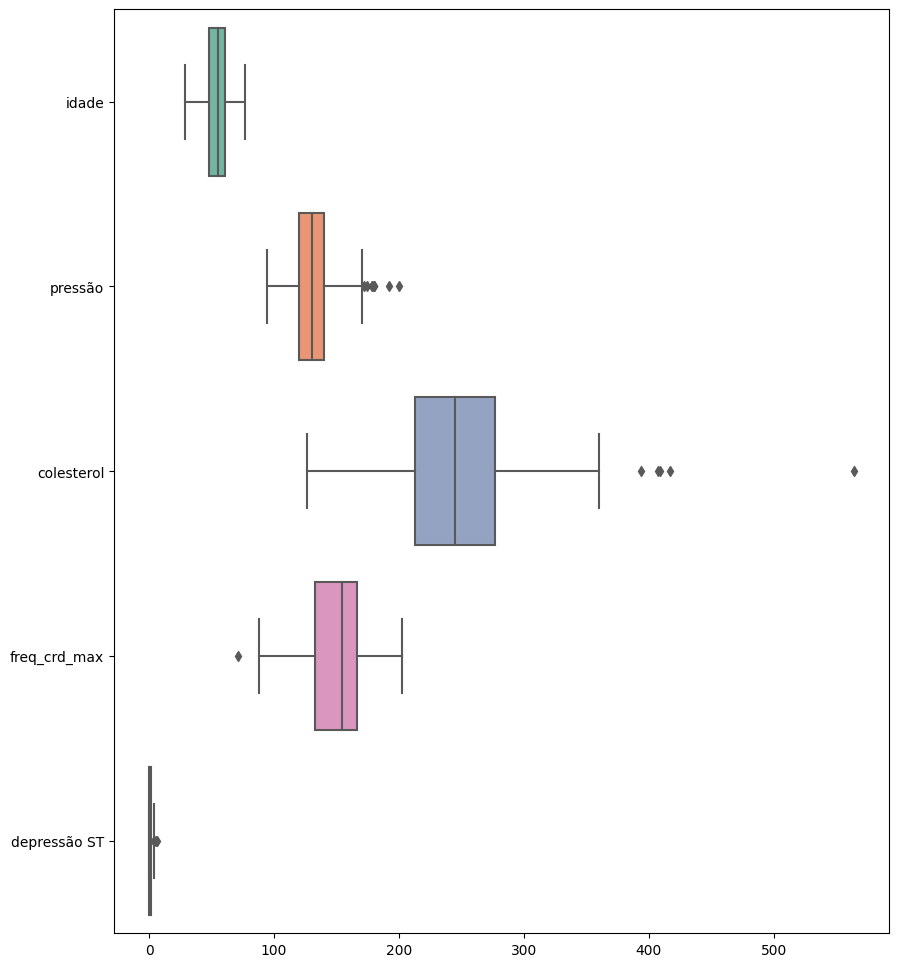

In [ ]:
plt.figure(figsize=(10, 12))

sns.boxplot(data=dataset_n, orient='h' ,order=[ 'idade',
 'pressão',
 'colesterol',
 'freq_crd_max',
 'depressão ST'], palette="Set2")

array([[<Axes: title={'center': 'idade'}>,
        <Axes: title={'center': 'pressão'}>],
       [<Axes: title={'center': 'colesterol'}>,
        <Axes: title={'center': 'freq_crd_max'}>],
       [<Axes: title={'center': 'depressão ST'}>, <Axes: >]], dtype=object)

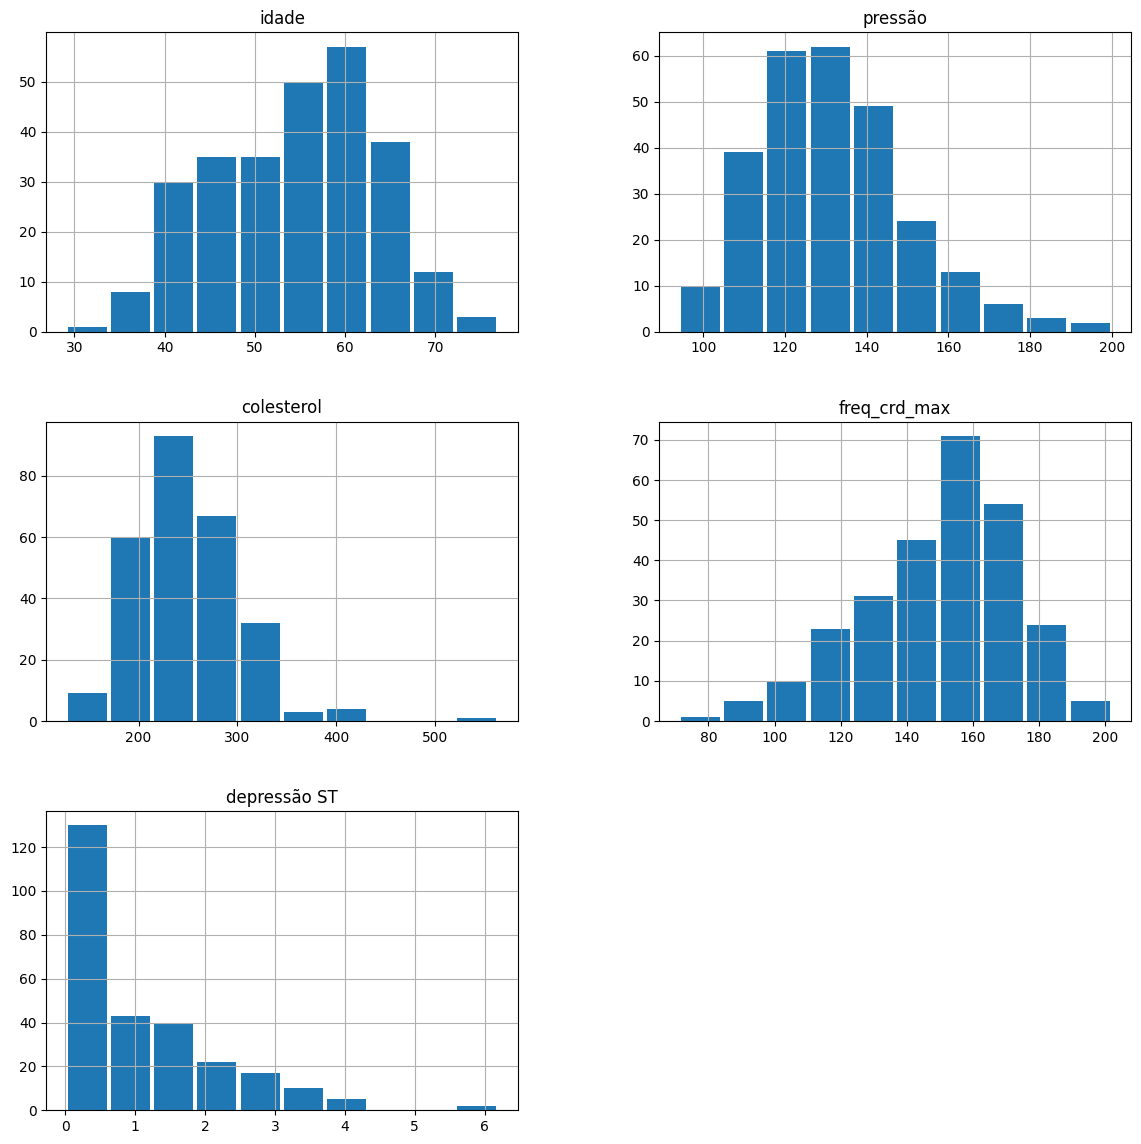

In [ ]:
dataset_n.hist(figsize=(14, 14), rwidth = 0.9)


# Normalização

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaleX = StandardScaler()

In [ ]:
dataset_n

,idade,pressão,colesterol,freq_crd_max,depressão ST
0,67.0,115.0,564.0,160.0,1.6
1,57.0,124.0,261.0,141.0,0.3
2,64.0,128.0,263.0,105.0,0.2
3,74.0,120.0,269.0,121.0,0.2
4,65.0,120.0,177.0,140.0,0.4
...,...,...,...,...,...
264,52.0,172.0,199.0,162.0,0.5
265,44.0,120.0,263.0,173.0,0.0
266,56.0,140.0,294.0,153.0,1.3
267,57.0,140.0,192.0,148.0,0.4


In [ ]:
#normalização com outliers pq não sabemos interpretar os outliers
df_max_scaled = dataset_n.copy()
for column in df_max_scaled.columns:
    df_max_scaled[column] = df_max_scaled[column] / df_max_scaled[column].abs().max()

# display(df_max_scaled)
#abs()absoluto , sem sinal

<Axes: >

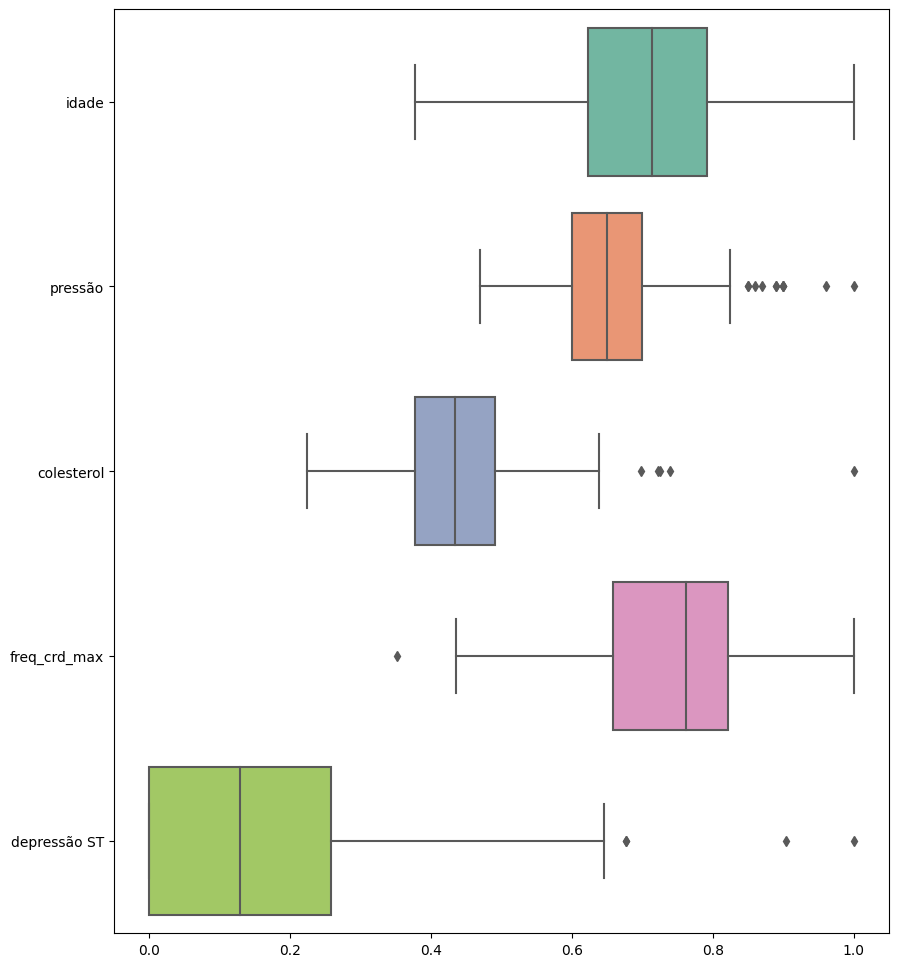

In [ ]:
plt.figure(figsize=(10, 12))

sns.boxplot(data=df_max_scaled , orient='h' ,order=[ 'idade',
 'pressão',
 'colesterol',
 'freq_crd_max',
 'depressão ST'], palette="Set2")

# Separação dos dados e labels

In [ ]:
dataset = (dataset - dataset.min()) / (dataset.max() - dataset.min())
dataset

,idade,pressão,colesterol,freq_crd_max,depressão ST,angina,sexo,glicemia>120,dor_1.0,dor_2.0,...,inclinação ST_2.0,inclinação ST_3.0,flurosopia_0.0,flurosopia_1.0,flurosopia_2.0,flurosopia_3.0,Tal_3.0,Tal_6.0,Tal_7.0,doença cardíaca
0,0.791667,0.198113,1.000000,0.679389,0.258065,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.583333,0.283019,0.308219,0.534351,0.048387,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0.729167,0.320755,0.312785,0.259542,0.032258,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.937500,0.245283,0.326484,0.381679,0.032258,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.750000,0.245283,0.116438,0.526718,0.064516,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,0.479167,0.735849,0.166667,0.694656,0.080645,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
265,0.312500,0.245283,0.312785,0.778626,0.000000,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
266,0.562500,0.433962,0.383562,0.625954,0.209677,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
267,0.583333,0.433962,0.150685,0.587786,0.064516,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
y = dataset["doença cardíaca"]
x = dataset.drop(["doença cardíaca"], axis=1)

In [ ]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=TEST_SIZE, random_state=SEED)

# Construção da rede

In [ ]:
# Inicialização da rede: Retorna uma tupla com (weights, bias)
def create_network(shape):
  weights = np.zeros(shape=shape)
  bias = 0
  return weights, bias


In [ ]:
# Função de ativação com o decorator np.vectorize, para arrays numpy
@np.vectorize
def activation(u, threshold):
  return 1 if u > threshold else 0

In [ ]:
def predict(x, weights, bias, threshold):
  u = np.sum(weights * x, axis=1) + bias
  return activation(u, threshold).astype(np.uint8)

In [ ]:
def perceptron(x_train, y_train, epochs, threshold, learning_rate, callbacks=[],
               network_shape=(25,)):
  weights, bias = create_network(shape=network_shape)
  for epoch in range(epochs):
    for x, y in zip(x_train.iterrows(), y_train):
      X = np.array(x[1])
      u = np.dot(weights, X) + bias
      y_hat = activation(u, threshold)

      if y_hat != y:
        weights = weights + learning_rate * (y - y_hat) * X
        bias = bias + learning_rate * (y - y_hat)

    # Execução de callbacks para acompanhamento do treino e geração de gráficos.
    if callbacks:
      for callback in callbacks:
        callback(weights, bias, threshold, current_epoch=epoch+1)

  return weights, bias

# Definição das métricas de treino

In [ ]:
# Callback para acompanhamento do processo de treino por época.
def evaluate_callback(weights, bias, threshold, current_epoch=1):
  y_hat = predict(x_test, weights, bias, threshold)
  print("[Epoch {}] Acc: {}, F1: {}".format(current_epoch,
                                            accuracy_score(y_test, y_hat),
                                            f1_score(y_test, y_hat)))

In [ ]:
#   Callback para captura do melhor conjunto (weights, bias) de acordo
# com uma determinada métrica.

best_weights = np.zeros(shape=(25,))
best_bias = 0
def best_model_callback_builder(metric, initial_score=0.0):
  best_score = initial_score

  def callback(weights, bias, threshold, current_epoch=1):
    global best_weights, best_bias
    nonlocal best_score
    y_hat = predict(x_test, weights, bias, threshold)

    current_score = metric(y_test, y_hat)
    if current_score > best_score:
      print("[Best model] Metric {} {} on epoch {}.".format(metric.__name__,
                                                            current_score,
                                                            current_epoch))
      best_score = current_score
      best_weights = weights
      best_bias = bias

  return callback

best_model_callback = best_model_callback_builder(
    metric=recall_score
)

In [ ]:
# Callback para armazenar as listas das métricas por época durate o treino.

recall_over_time = np.zeros(shape=(EPOCHS,))
acc_over_time = np.zeros(shape=(EPOCHS,))
f1_over_time = np.zeros(shape=(EPOCHS,))
def metric_collector_builder():
  def callback(weights, bias, threshold, current_epoch=1):
    global acc_over_time, f1_over_time

    y_hat = predict(x_test, weights, bias, threshold)

    recall_over_time[current_epoch-1] = recall_score(y_test, y_hat)
    acc_over_time[current_epoch-1] = accuracy_score(y_test, y_hat)
    f1_over_time[current_epoch-1] = f1_score(y_test, y_hat)

  return callback

metric_collector_callback = metric_collector_builder()

# Treino do modelo

In [ ]:
callbacks = [best_model_callback, metric_collector_callback]
weights, bias = perceptron(x_train, y_train, EPOCHS, THRESHOLD,
                           ETA, callbacks=callbacks)

[Best model] Metric recall_score 0.027777777777777776 on epoch 1.
[Best model] Metric recall_score 0.7777777777777778 on epoch 2.
[Best model] Metric recall_score 0.8888888888888888 on epoch 3.
[Best model] Metric recall_score 0.9166666666666666 on epoch 38.
[Best model] Metric recall_score 0.9444444444444444 on epoch 66.


In [ ]:
# Guardando valor de weights e bias
recall_w, recall_b = best_weights, best_bias

callbacks = [best_model_callback, best_model_callback_builder(
    metric=f1_score
)]
weights, bias = perceptron(x_train, y_train, EPOCHS, THRESHOLD,
                           ETA, callbacks=callbacks)

[Best model] Metric f1_score 0.05405405405405406 on epoch 1.
[Best model] Metric f1_score 0.7999999999999999 on epoch 2.
[Best model] Metric f1_score 0.8205128205128205 on epoch 3.
[Best model] Metric f1_score 0.8421052631578948 on epoch 47.
[Best model] Metric f1_score 0.8461538461538461 on epoch 59.
[Best model] Metric f1_score 0.8571428571428571 on epoch 63.
[Best model] Metric f1_score 0.8607594936708861 on epoch 68.
[Best model] Metric f1_score 0.8611111111111112 on epoch 108.
[Best model] Metric f1_score 0.8799999999999999 on epoch 113.
[Best model] Metric f1_score 0.8918918918918918 on epoch 121.
[Best model] Metric f1_score 0.9014084507042254 on epoch 130.


In [ ]:
# Guardando valor de weights e bias
f1_w, f1_b = best_weights, best_bias

callbacks = [best_model_callback, best_model_callback_builder(
    metric=accuracy_score
)]
weights, bias = perceptron(x_train, y_train, EPOCHS, THRESHOLD,
                           ETA, callbacks=callbacks)

[Best model] Metric accuracy_score 0.5679012345679012 on epoch 1.
[Best model] Metric accuracy_score 0.8271604938271605 on epoch 2.
[Best model] Metric accuracy_score 0.8518518518518519 on epoch 47.
[Best model] Metric accuracy_score 0.8641975308641975 on epoch 63.
[Best model] Metric accuracy_score 0.8765432098765432 on epoch 108.
[Best model] Metric accuracy_score 0.8888888888888888 on epoch 113.
[Best model] Metric accuracy_score 0.9012345679012346 on epoch 121.
[Best model] Metric accuracy_score 0.9135802469135802 on epoch 130.


# Resultados e gráficos

Matriz de confusão do modelo com f1 score

In [ ]:
y_test_hat = predict(x_test, f1_w, f1_b, THRESHOLD)
print("F1:", recall_score(y_test, y_test_hat))

pd.crosstab(y_test, y_test_hat, rownames=['True'], colnames=['Predicted'], margins=True)

F1: 0.8888888888888888


Predicted,0,1,All
True,,,
0.0,42,3,45
1.0,4,32,36
All,46,35,81


Matriz de confusão do modelo com recall

In [ ]:
y_test_hat = predict(x_test, recall_w, recall_b, THRESHOLD)
print("Recall:", recall_score(y_test, y_test_hat))

pd.crosstab(y_test, y_test_hat, rownames=['True'], colnames=['Predicted'], margins=True)

Recall: 0.9444444444444444


Predicted,0,1,All
True,,,
0.0,35,10,45
1.0,2,34,36
All,37,44,81


Matriz de confusão do modelo com acurácia

In [ ]:
y_test_hat = predict(x_test, best_weights, best_bias, THRESHOLD)

print("Acurácia:", accuracy_score(y_test, y_test_hat))
pd.crosstab(y_test, y_test_hat, rownames=['True'], colnames=['Predicted'], margins=True)


Acurácia: 0.9135802469135802


Predicted,0,1,All
True,,,
0.0,42,3,45
1.0,4,32,36
All,46,35,81


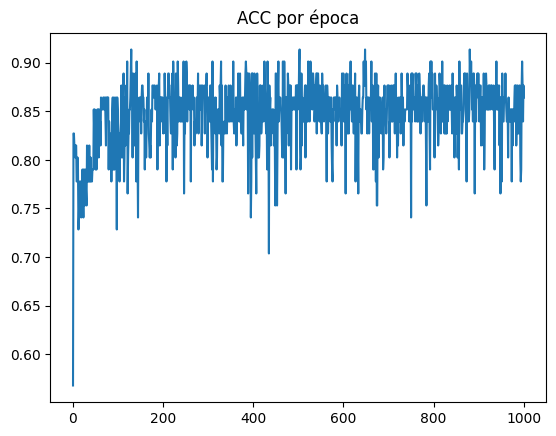

In [ ]:
plt.plot(list(range(1, EPOCHS+1)), acc_over_time)
plt.title("ACC por época")
plt.show()

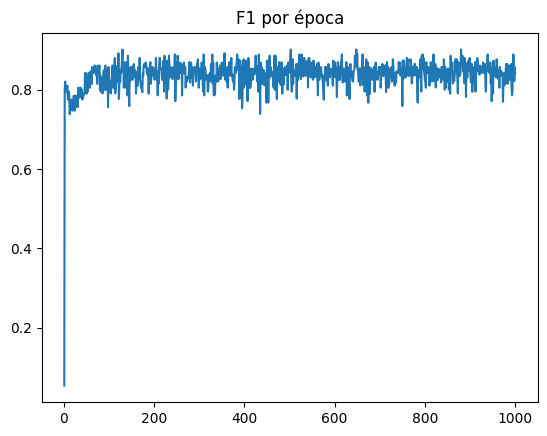

In [ ]:
plt.plot(list(range(1, EPOCHS+1)), f1_over_time)
plt.title("F1 por época")
plt.show()

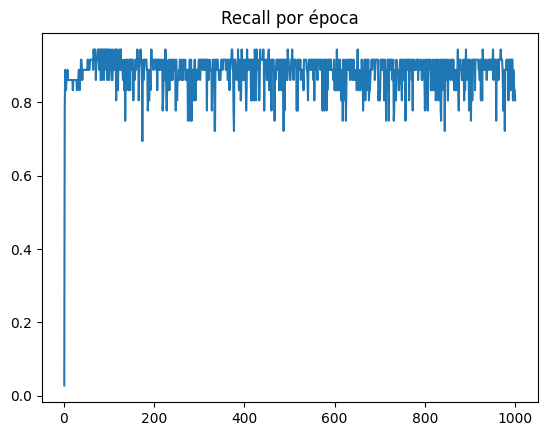

In [ ]:
plt.plot(list(range(1, EPOCHS+1)), recall_over_time)
plt.title("Recall por época")
plt.show()

# Conclusões

Modelos avaliados com acurácia e F1 apresentaram desempenho semelhante, com acurácia = 0.9135 e F1 = 0.8888.

No entanto, como este é um modelo de diagnóstico médico, falsos negativos são extremamente prejudiciais pois avaliariam um paciente doente como saudável. Seria recomendado o uso do modelo avaliado com a métrica *recall*, com valor 0.9444 e 2 diagnósticos incorretos de pacientes doentes cardíacos avaliados como saudáveis em um universo de 81 pacientes testados e 36 doentes; os modelos avaliados com F1 e acurácia classificaram incorretamente 4 dos 36 pacientes doentes.